In [6]:
'''
The goal of this project is to use Reinforced Learning together with time series data to predict the outcome of fuel prices.
We will begin with data validation and cleaning.
Then we will dive into Exploratory Data Analysis and Visualization to see insights
'''

'\nThe goal of this project is to use Reinforced Learning together with time series data to predict the outcome of fuel prices.\nWe will begin with data validation and cleaning.\nThen we will dive into Exploratory Data Analysis and Visualization to see insights\n'

In [7]:
#installing baselines3
!pip install stable-baselines3

In [38]:
#installing gym
!pip install gymnasium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from stable_baselines3 import DQN
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3.common.env_checker import check_env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#reading the dataset into a csv
file_path =r'/content/fuel price.csv'

fuel_prices = pd.read_csv(file_path)

#printing the first five rows
fuel_prices.head()

,Unnamed: 0,Date,Pump price in pence/litre (ULSP),Pump price in pence/litre (ULSD),Duty rate in pence/litre (ULSP),Duty rate in pence/litre (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2,09/06/2003,74.59,76.77,45.82,45.82,17.5,17.5
1,3,16/06/2003,74.47,76.69,45.82,45.82,17.5,17.5
2,4,23/06/2003,74.42,76.62,45.82,45.82,17.5,17.5
3,5,30/06/2003,74.35,76.51,45.82,45.82,17.5,17.5
4,6,07/07/2003,74.28,76.46,45.82,45.82,17.5,17.5


In [11]:
#check for duplicates
fuel_prices.duplicated(subset='Unnamed: 0').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [12]:
'''
The dataset has no duplicate rows hence we can proceed with data validation and cleaning.
'''

'\nThe dataset has no duplicate rows hence we can proceed with data validation and cleaning.\n'

In [13]:
#check the info of the dataset
fuel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        909 non-null    int64  
 1   Date                              909 non-null    object 
 2   Pump price in pence/litre (ULSP)  909 non-null    float64
 3   Pump price in pence/litre (ULSD)  909 non-null    float64
 4   Duty rate in pence/litre (ULSP)   909 non-null    float64
 5   Duty rate in pence/litre (ULSD)   909 non-null    float64
 6   VAT percentage rate (ULSP)        909 non-null    float64
 7   VAT percentage rate (ULSD)        909 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 56.9+ KB


In [14]:
'''
From the above, we can see that there are no missing values in all the rows. However, the 'Date' column is of the object data
type.
We will convert the  column to a date data type. Then we will continue to determine the relationship between the columns
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nFrom the above, we can see that there are no missing values in all the rows. However, the 'Date' column is of the object data\ntype.\nWe will convert the  column to a date data type. Then we will continue to determine the relationship between the columns\n"

In [15]:
#converting the date column
fuel_prices['Date'] = pd.to_datetime(fuel_prices['Date'], format='%d/%m/%Y')

#checking the dataframe again
fuel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        909 non-null    int64         
 1   Date                              909 non-null    datetime64[ns]
 2   Pump price in pence/litre (ULSP)  909 non-null    float64       
 3   Pump price in pence/litre (ULSD)  909 non-null    float64       
 4   Duty rate in pence/litre (ULSP)   909 non-null    float64       
 5   Duty rate in pence/litre (ULSD)   909 non-null    float64       
 6   VAT percentage rate (ULSP)        909 non-null    float64       
 7   VAT percentage rate (ULSD)        909 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 56.9 KB


In [16]:
#rename the column names
rename_columns = {
    'Pump price in pence/litre (ULSP)':'Pump price (ULSP)',
    'Pump price in pence/litre (ULSD)':'Pump price (ULSD)',
    'Duty rate in pence/litre (ULSP)':'Duty rate (ULSP)',
    'Duty rate in pence/litre (ULSD)':'Duty rate (ULSD)',
}

fuel_prices.rename(columns=rename_columns, inplace=True)

#check the info
fuel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  909 non-null    int64         
 1   Date                        909 non-null    datetime64[ns]
 2   Pump price (ULSP)           909 non-null    float64       
 3   Pump price (ULSD)           909 non-null    float64       
 4   Duty rate (ULSP)            909 non-null    float64       
 5   Duty rate (ULSD)            909 non-null    float64       
 6   VAT percentage rate (ULSP)  909 non-null    float64       
 7   VAT percentage rate (ULSD)  909 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 56.9 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


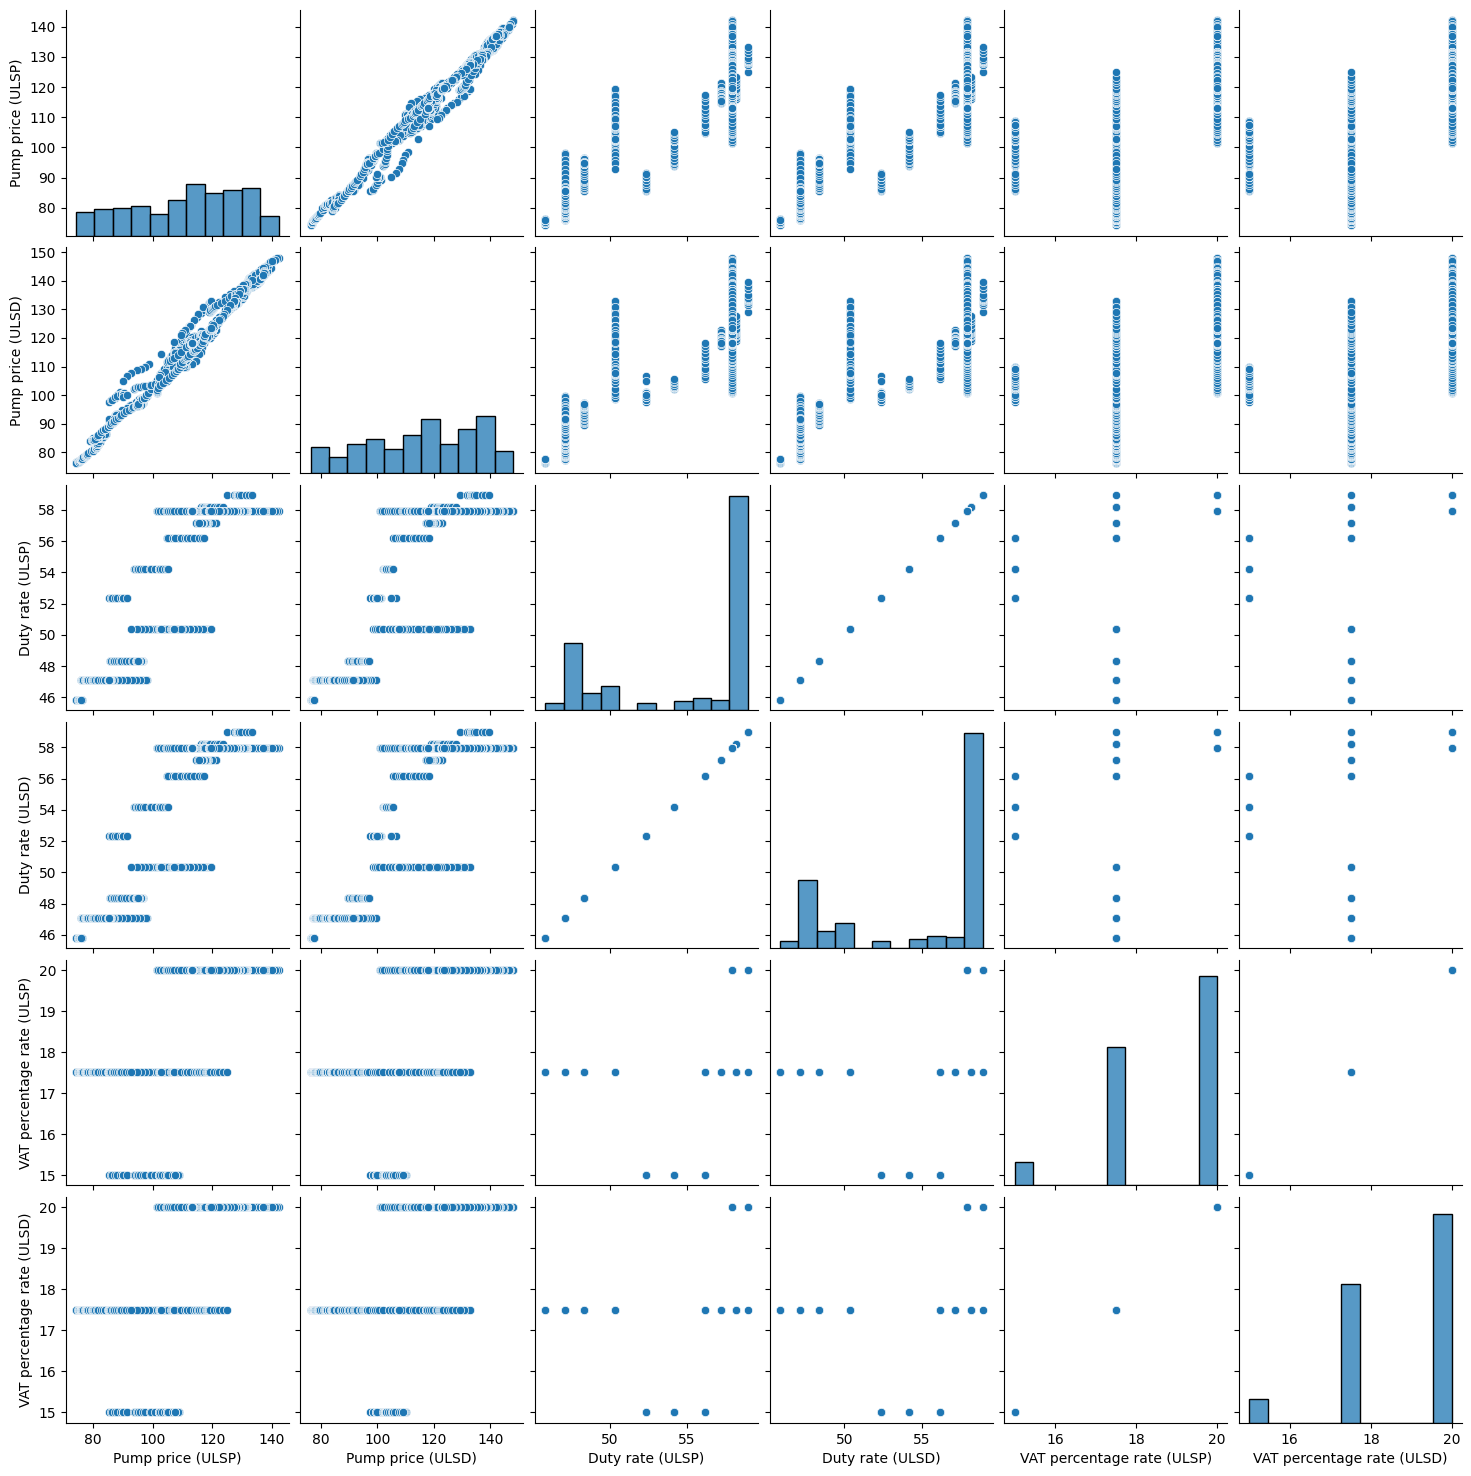

In [17]:
#check the relationionship between the prices and the external factors
columns = fuel_prices[['Pump price (ULSP)', 'Pump price (ULSD)', 'Duty rate (ULSP)', 'Duty rate (ULSD)', 'VAT percentage rate (ULSP)', 'VAT percentage rate (ULSD)']]

#create a pairplot
sns.pairplot(data=columns)

#show the plot
plt.show()

In [18]:
#checking the corrrelation between the columns
columns.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pump price (ULSP),Pump price (ULSD),Duty rate (ULSP),Duty rate (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
Pump price (ULSP),1.000000,0.989706,0.860290,0.860290,0.690515,0.690515
Pump price (ULSD),0.989706,1.000000,0.833870,0.833870,0.666197,0.666197
Duty rate (ULSP),0.860290,0.833870,1.000000,1.000000,0.688242,0.688242
Duty rate (ULSD),0.860290,0.833870,1.000000,1.000000,0.688242,0.688242
VAT percentage rate (ULSP),0.690515,0.666197,0.688242,0.688242,1.000000,1.000000
VAT percentage rate (ULSD),0.690515,0.666197,0.688242,0.688242,1.000000,1.000000


In [19]:
'''
From the above visualitation and dataframe. We can see that there is a strong relationship between the Pump Prices (ULSP) and the Pump Prices (ULSD), the Pump price
and their respective duty rates. There is a weak relationship between the duty rates and the VAT rates.
Next we will drop the irrelevant columns and proceed to see the distribution of the dataset
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nFrom the above visualitation and dataframe. We can see that there is a strong relationship between the Pump Prices (ULSP) and the Pump Prices (ULSD), the Pump price\nand their respective duty rates. There is a weak relationship between the duty rates and the VAT rates.\nNext we will drop the irrelevant columns and proceed to see the distribution of the dataset\n'

In [20]:
#dropp irrelevant column
fuel_prices.drop(['Unnamed: 0'], axis=1, inplace=True)

#check the dataframe
fuel_prices.head()

,Date,Pump price (ULSP),Pump price (ULSD),Duty rate (ULSP),Duty rate (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2003-06-09,74.59,76.77,45.82,45.82,17.5,17.5
1,2003-06-16,74.47,76.69,45.82,45.82,17.5,17.5
2,2003-06-23,74.42,76.62,45.82,45.82,17.5,17.5
3,2003-06-30,74.35,76.51,45.82,45.82,17.5,17.5
4,2003-07-07,74.28,76.46,45.82,45.82,17.5,17.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


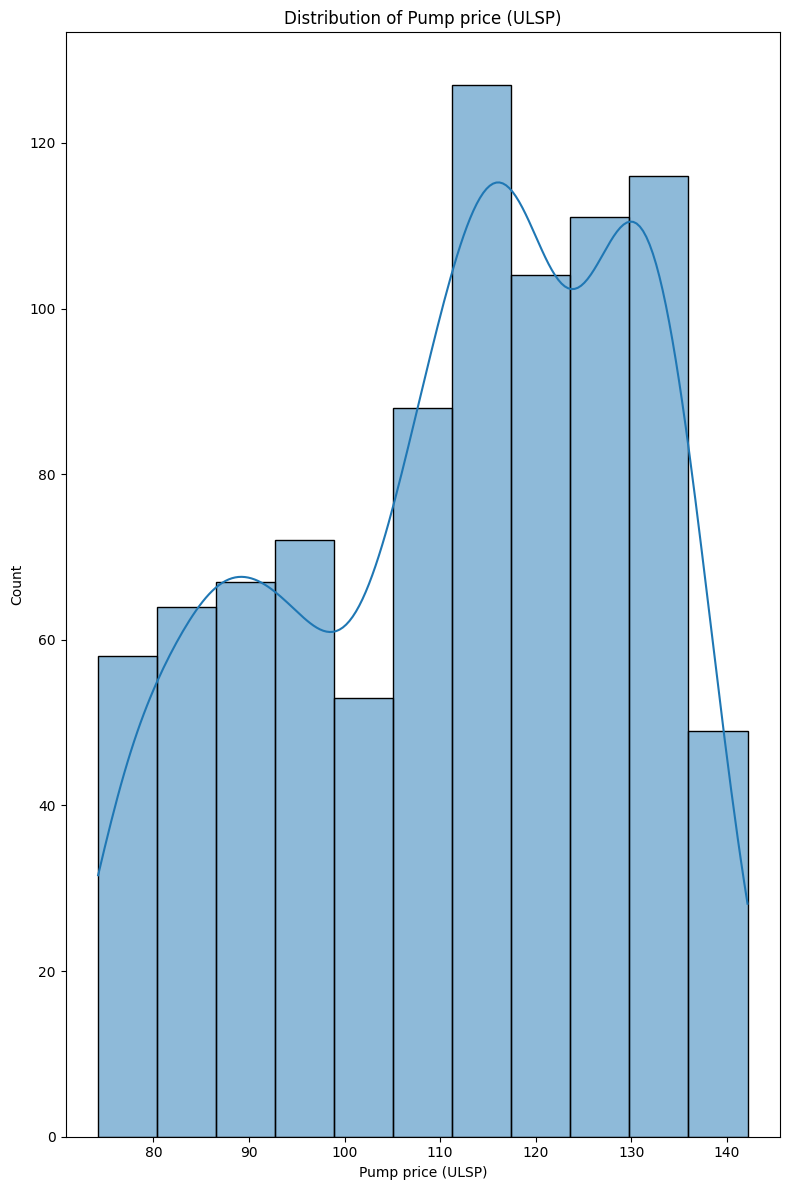

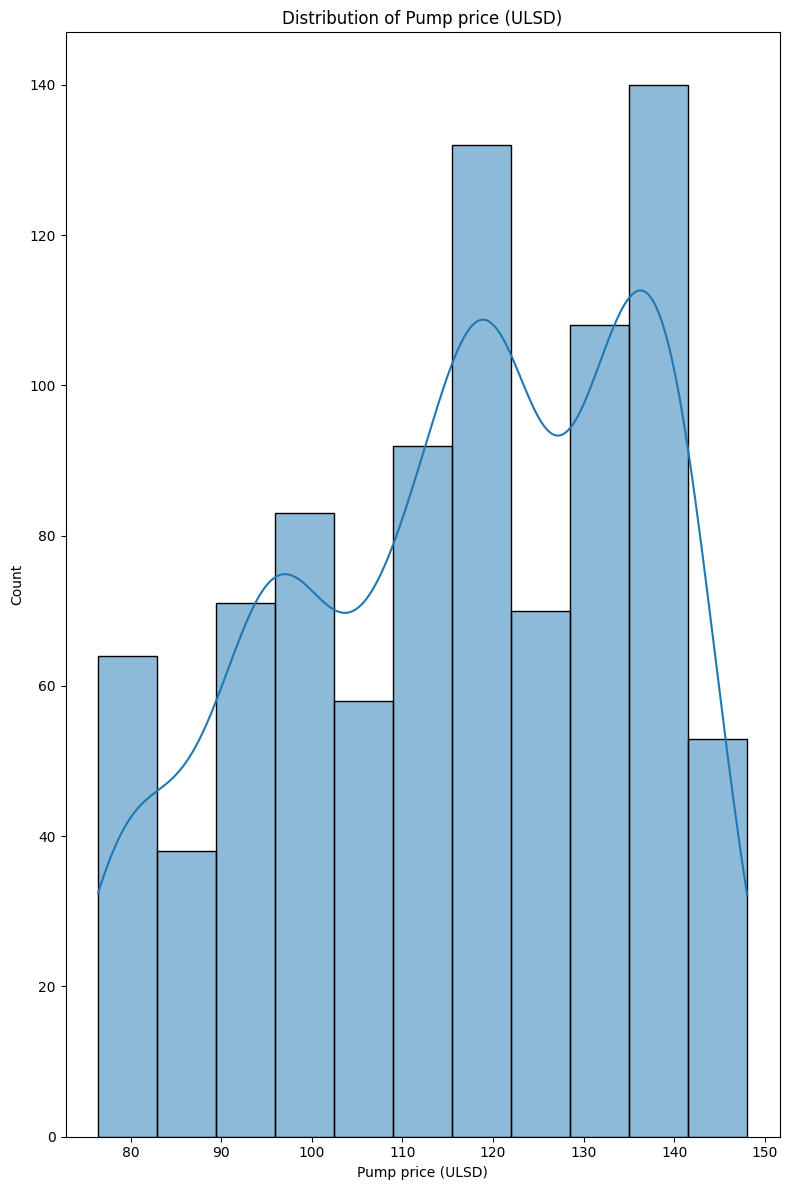

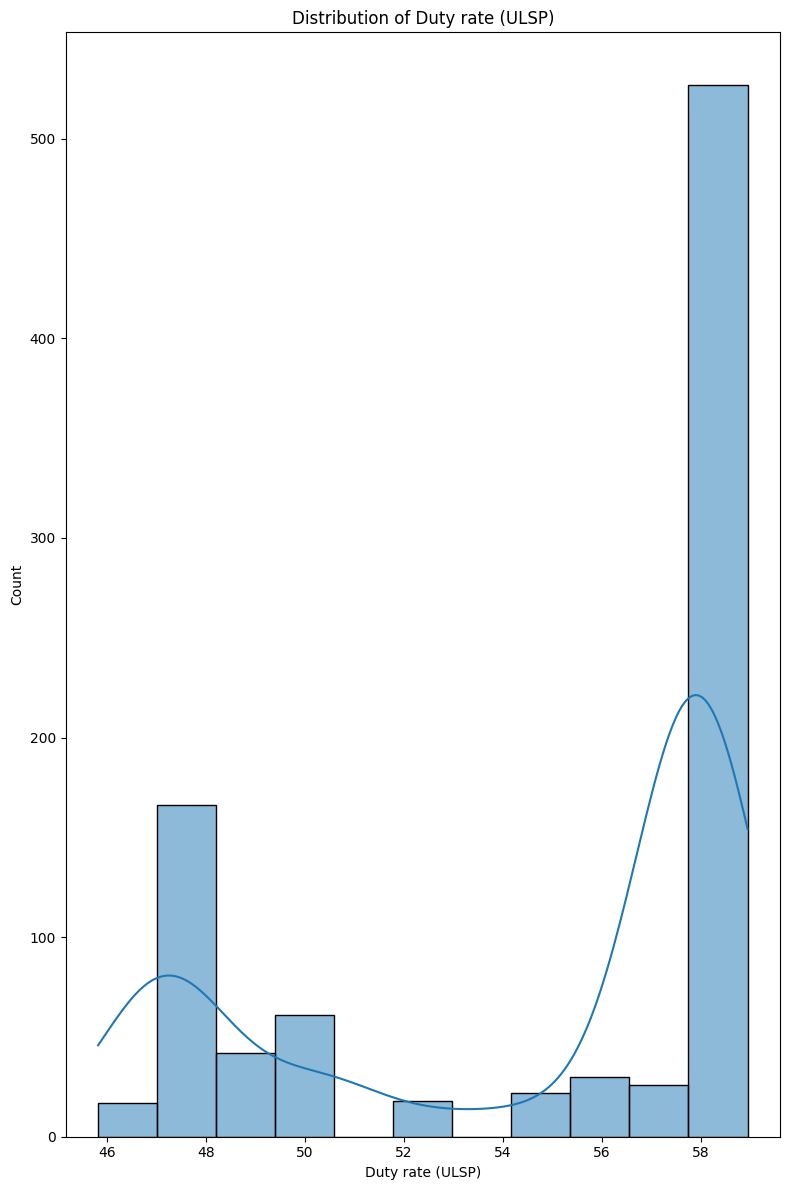

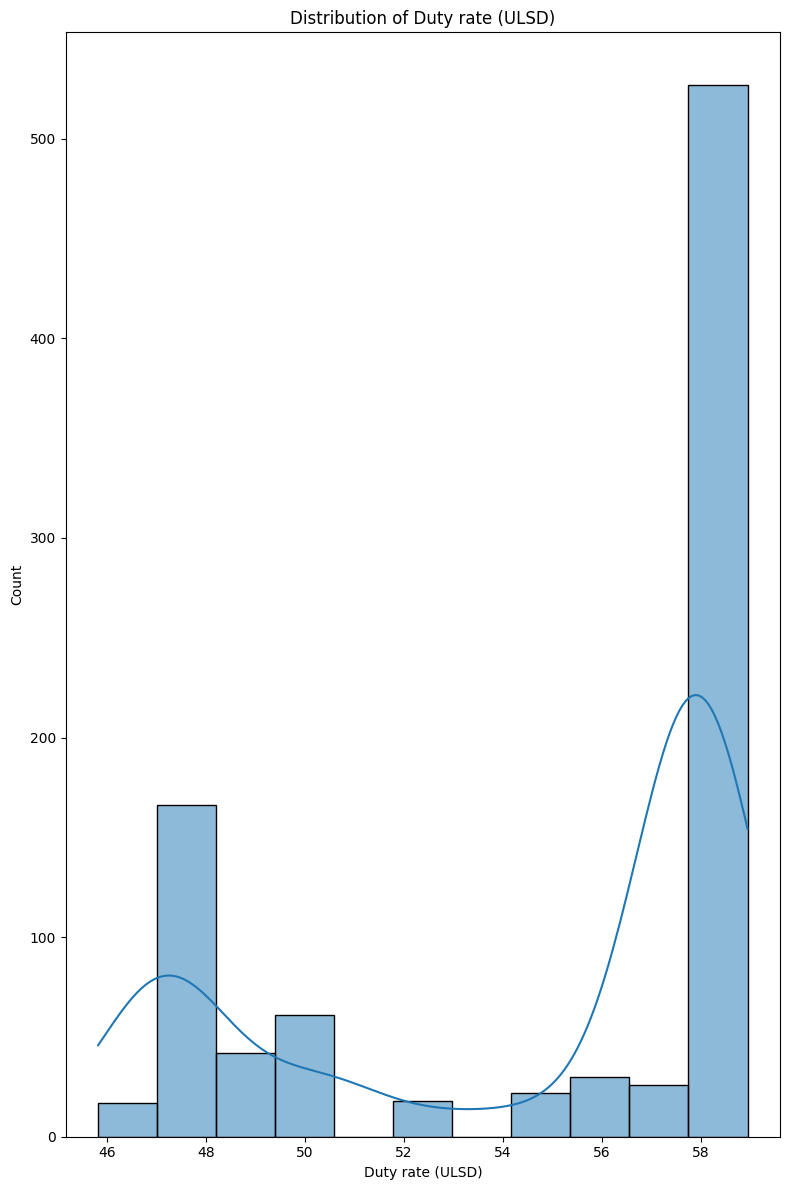

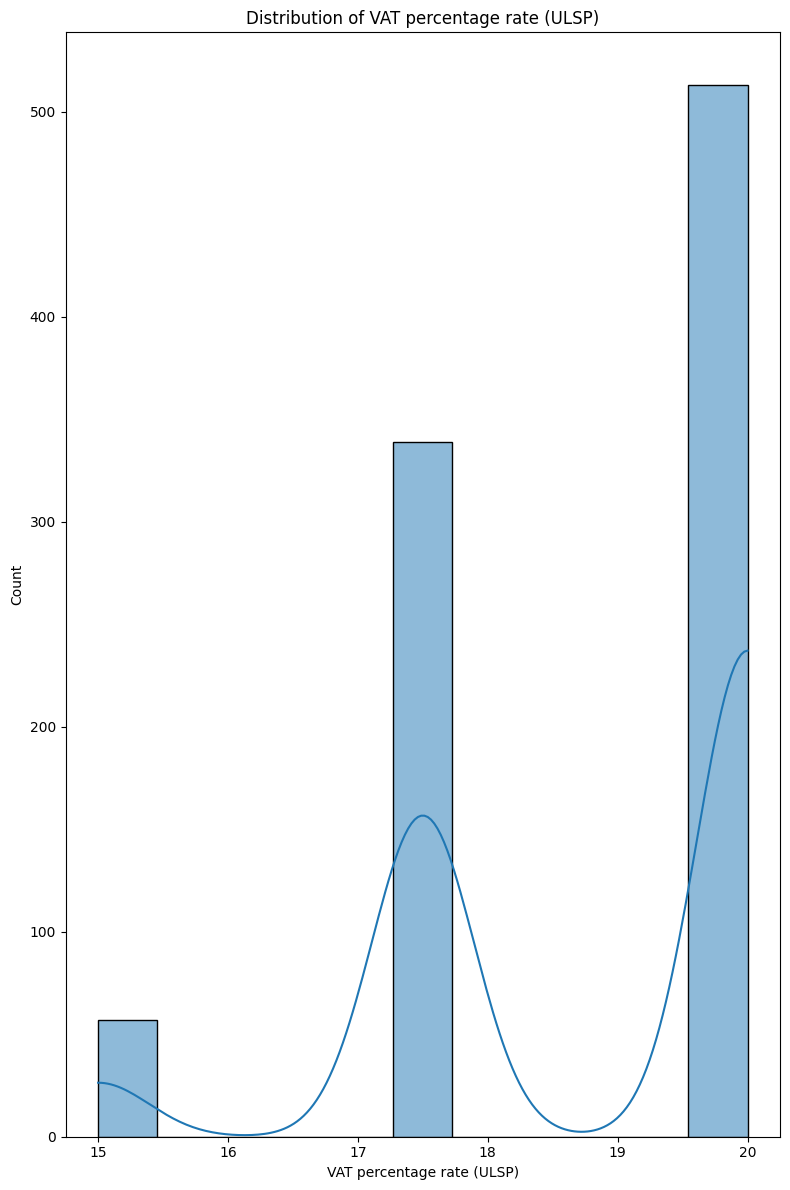

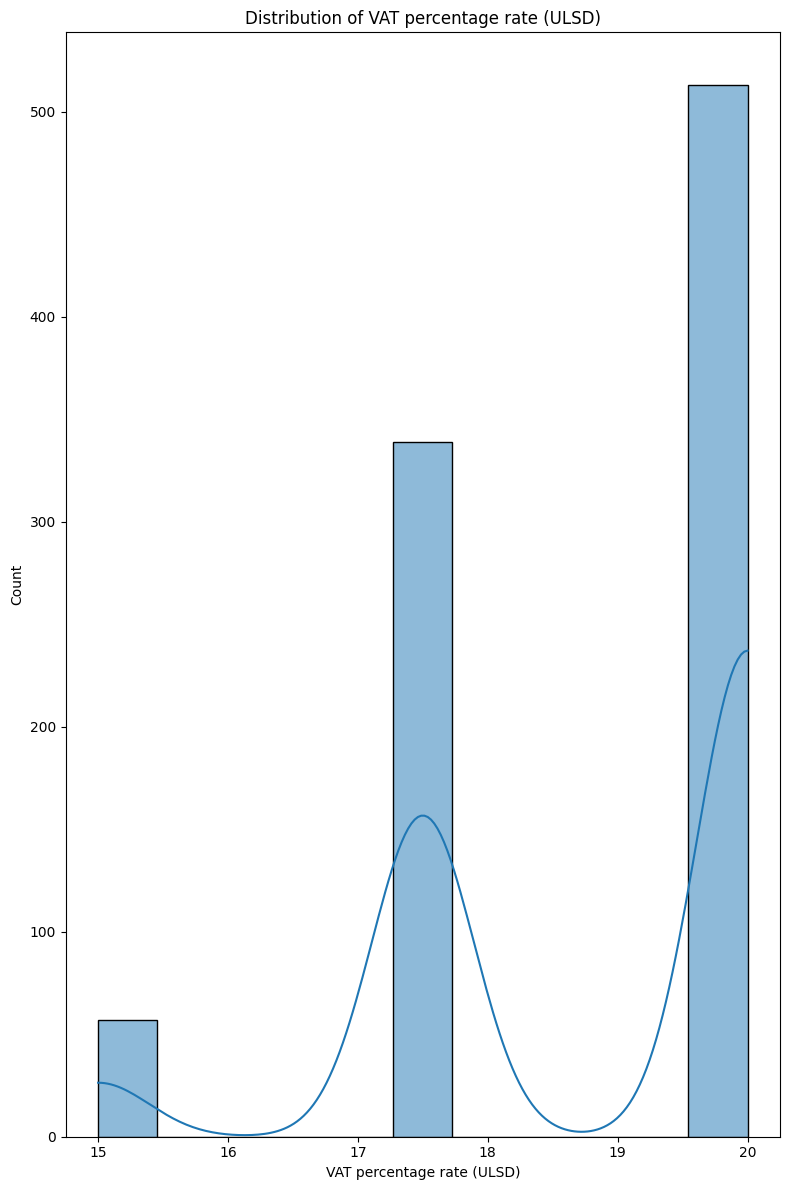

In [21]:
#visualizing the distribution for each column
columns = ['Pump price (ULSP)', 'Pump price (ULSD)', 'Duty rate (ULSP)', 'Duty rate (ULSD)', 'VAT percentage rate (ULSP)', 'VAT percentage rate (ULSD)']
for column in columns:
    plt.figure(figsize=(8,12))
    sns.histplot(data=fuel_prices, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    #set tight_layout
    plt.tight_layout()

    #show the plot
    plt.show()

In [22]:
'''
From the visualization we can see that the distributions is not a normal one. this however does not affect the data for reinforcement learning.
Next we will look at the descriptive statistics, check for outliers and handle them if it arises.
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nFrom the visualization we can see that the distributions is not a normal one. this however does not affect the data for reinforcement learning.\nNext we will look at the descriptive statistics, check for outliers and handle them if it arises.\n'

In [23]:
#check the descriptive statistics
fuel_prices.describe()

,Date,Pump price (ULSP),Pump price (ULSD),Duty rate (ULSP),Duty rate (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
count,909,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,2012-02-20 00:11:05.346534656,111.090583,115.631617,54.523080,54.523080,18.754125,18.754125
min,2003-06-09 00:00:00,74.210000,76.410000,45.820000,45.820000,15.000000,15.000000
25%,2007-10-15 00:00:00,95.710000,99.180000,50.350000,50.350000,17.500000,17.500000
50%,2012-02-20 00:00:00,113.720000,118.110000,57.950000,57.950000,20.000000,20.000000
75%,2016-06-27 00:00:00,127.540000,132.600000,57.950000,57.950000,20.000000,20.000000
max,2020-11-02 00:00:00,142.170000,148.040000,58.950000,58.950000,20.000000,20.000000
std,NaN,18.308105,19.414181,4.664805,4.664805,1.532611,1.532611


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


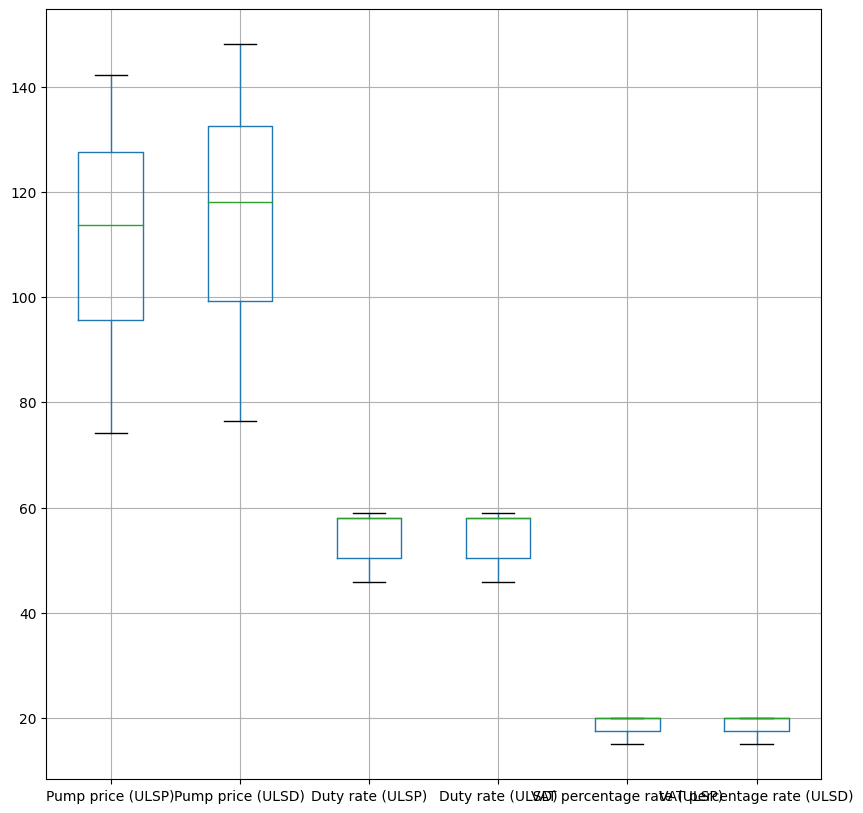

In [24]:
#visualizing the spread using boxplot
fuel_prices.boxplot(figsize=(10,10))

#show the plot
plt.show()

In [25]:
'''
From the descriptive statistics and the visualization above, there are no outliers in the dataset.
Next we will explore the trends in the fuel prices and their respective external factors.
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nFrom the descriptive statistics and the visualization above, there are no outliers in the dataset.\nNext we will explore the trends in the fuel prices and their respective external factors.\n'

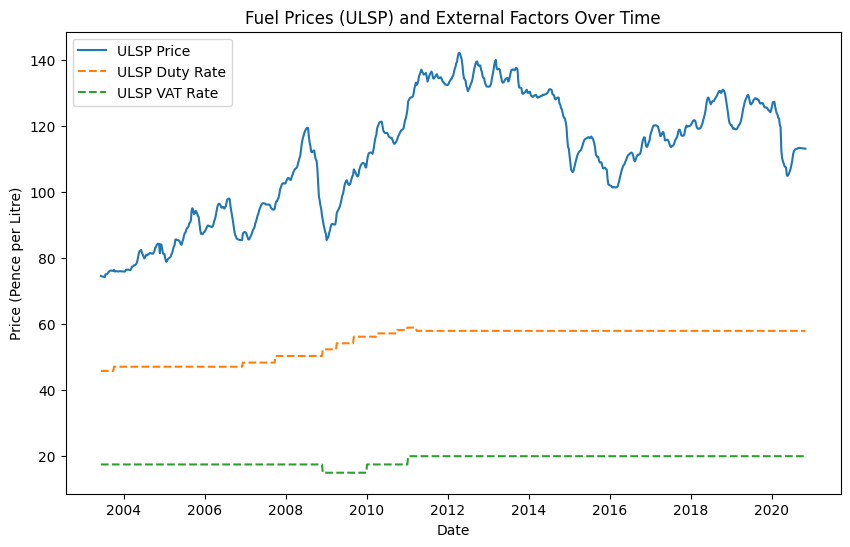

In [26]:
# Plotting fuel prices ULSP and external factors over time
plt.figure(figsize=(10, 6))
plt.plot(fuel_prices['Date'], fuel_prices['Pump price (ULSP)'], label='ULSP Price')
plt.plot(fuel_prices['Date'], fuel_prices['Duty rate (ULSP)'], label='ULSP Duty Rate', linestyle='--')
plt.plot(fuel_prices['Date'], fuel_prices['VAT percentage rate (ULSP)'], label='ULSP VAT Rate', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price (Pence per Litre)')
plt.title('Fuel Prices (ULSP) and External Factors Over Time')
plt.legend()
plt.show()

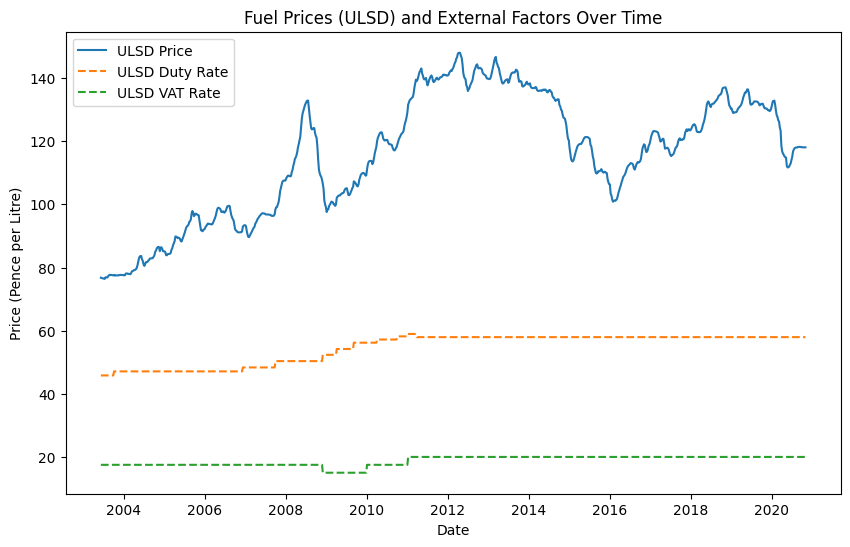

In [27]:
# Plotting fuel prices ULSD and external factors over time
plt.figure(figsize=(10, 6))
plt.plot(fuel_prices['Date'], fuel_prices['Pump price (ULSD)'], label='ULSD Price')
plt.plot(fuel_prices['Date'], fuel_prices['Duty rate (ULSD)'], label='ULSD Duty Rate', linestyle='--')
plt.plot(fuel_prices['Date'], fuel_prices['VAT percentage rate (ULSD)'], label='ULSD VAT Rate', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price (Pence per Litre)')
plt.title('Fuel Prices (ULSD) and External Factors Over Time')
plt.legend()
plt.show()

In [28]:
'''
From the above we see that fuel prices have sudden spikes and dips. However their respective duty rates and VAT rates are somewhat stable.
This means that the VAT rates and Duty rates do not have strong influence on the fuel prices.
Next we will see try new feature exchange rate. We will use numpy random function to generate new features and add these to our dataset.
We will add the exchange rate values 1.2 and 1.6 indicating a low and high exchange rate respectively.
'''

'\nFrom the above we see that fuel prices have sudden spikes and dips. However their respective duty rates and VAT rates are somewhat stable.\nThis means that the VAT rates and Duty rates do not have strong influence on the fuel prices.\nNext we will see try new feature exchange rate. We will use numpy random function to generate new features and add these to our dataset.\nWe will add the exchange rate values 1.2 and 1.6 indicating a low and high exchange rate respectively.\n'

In [29]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random exchange rate values (baseline, between 1.2 and 1.6)
num_rows = len(fuel_prices)
exchange_rates = np.random.uniform(low=1.2, high=1.6, size=num_rows)

# Introduce random spikes/dips
# Choose 5% of the data points to have spikes/dips
num_spikes = int(0.05 * num_rows)
spike_indices = np.random.choice(num_rows, num_spikes, replace=False)

# Apply spikes (e.g., multiply by a random factor between 1.5 and 3.0 for spikes)
exchange_rates[spike_indices] *= np.random.uniform(1.5, 3.0, size=num_spikes)

# You can also introduce dips (by multiplying by 0.5 to 0.8)
dip_indices = np.random.choice(num_rows, num_spikes, replace=False)
exchange_rates[dip_indices] *= np.random.uniform(0.5, 0.8, size=num_spikes)

# Add the modified exchange rates to the DataFrame as a new column
fuel_prices['Exchange Rate'] = exchange_rates

# Check the first few rows to verify the new column with spikes and dips
fuel_prices.head()


,Date,Pump price (ULSP),Pump price (ULSD),Duty rate (ULSP),Duty rate (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD),Exchange Rate
0,2003-06-09,74.59,76.77,45.82,45.82,17.5,17.5,1.349816
1,2003-06-16,74.47,76.69,45.82,45.82,17.5,17.5,1.580286
2,2003-06-23,74.42,76.62,45.82,45.82,17.5,17.5,1.492798
3,2003-06-30,74.35,76.51,45.82,45.82,17.5,17.5,1.439463
4,2003-07-07,74.28,76.46,45.82,45.82,17.5,17.5,1.262407


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


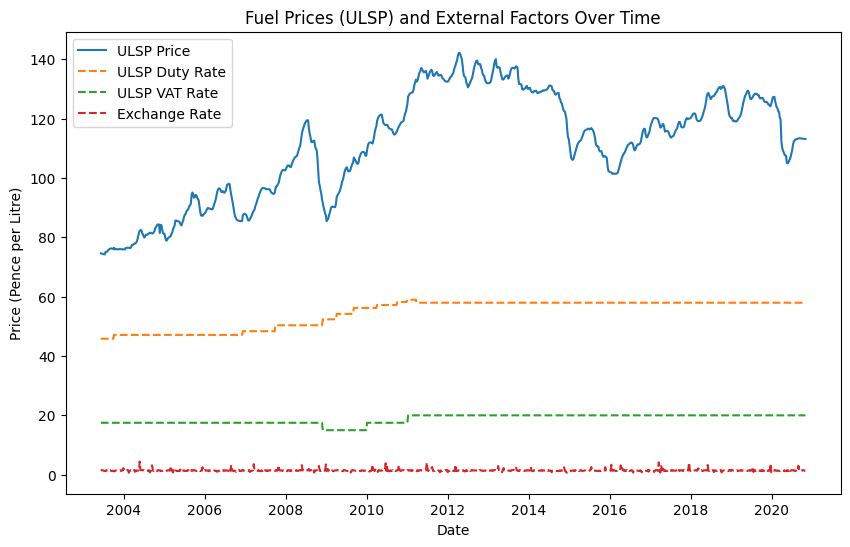

In [30]:
# Plott fuel prices ULSP and external factors over time again
plt.figure(figsize=(10, 6))
plt.plot(fuel_prices['Date'], fuel_prices['Pump price (ULSP)'], label='ULSP Price')
plt.plot(fuel_prices['Date'], fuel_prices['Duty rate (ULSP)'], label='ULSP Duty Rate', linestyle='--')
plt.plot(fuel_prices['Date'], fuel_prices['VAT percentage rate (ULSP)'], label='ULSP VAT Rate', linestyle='--')
plt.plot(fuel_prices['Date'], fuel_prices['Exchange Rate'], label='Exchange Rate', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price (Pence per Litre)')
plt.title('Fuel Prices (ULSP) and External Factors Over Time')
plt.legend()
plt.show()

In [31]:
'''
Adding a new feature did not work. We will proceed without the 'Exchange Rate' feature.
We will drop the 'Exchange Rate' column and proceed with the reinforcement learning.
'''

"\nAdding a new feature did not work. We will proceed without the 'Exchange Rate' feature.\nWe will drop the 'Exchange Rate' column and proceed with the reinforcement learning.\n"

In [32]:
#drop the exchange rate column
fuel_prices.drop(['Exchange Rate'], axis=1, inplace=True)

#check the dataframe
fuel_prices.head()

,Date,Pump price (ULSP),Pump price (ULSD),Duty rate (ULSP),Duty rate (ULSD),VAT percentage rate (ULSP),VAT percentage rate (ULSD)
0,2003-06-09,74.59,76.77,45.82,45.82,17.5,17.5
1,2003-06-16,74.47,76.69,45.82,45.82,17.5,17.5
2,2003-06-23,74.42,76.62,45.82,45.82,17.5,17.5
3,2003-06-30,74.35,76.51,45.82,45.82,17.5,17.5
4,2003-07-07,74.28,76.46,45.82,45.82,17.5,17.5


In [33]:
'''
We will now move on to the next step of this project: Reinforcement Learning.
First we will create an environment for the reinforcement learning and define the actions and observations.
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nWe will now move on to the next step of this project: Reinforcement Learning.\n\n'

In [54]:
class FuelPriceEnv(gym.Env):  # Inherit from gymnasium.Env
    def __init__(self, data):
        super(FuelPriceEnv, self).__init__()
        self.data = data
        self.current_step = 0

        # Define action and observation space
        self.action_space = spaces.Discrete(5)  # Actions: Buy ULSP, Sell ULSP, etc.
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)

    def reset(self, seed=None):
      self.current_step = 0
      observation = self._next_observation()
      info = {}
      return observation, info

    def _next_observation(self):
        return np.array([
            self.data['Pump price (ULSP)'].iloc[self.current_step],
            self.data['Pump price (ULSD)'].iloc[self.current_step],
            self.data['Duty rate (ULSP)'].iloc[self.current_step],
            self.data['Duty rate (ULSD)'].iloc[self.current_step],
            self.data['VAT percentage rate (ULSP)'].iloc[self.current_step],
            self.data['VAT percentage rate (ULSD)'].iloc[self.current_step]
        ], dtype=np.float32) # Explicitly set the data type to float32

    def step(self, action):
        self.current_step += 1
        ulsp_price_current = self.data['Pump price (ULSP)'].iloc[self.current_step - 1]
        ulsp_price_next = self.data['Pump price (ULSP)'].iloc[self.current_step]
        ulsd_price_current = self.data['Pump price (ULSD)'].iloc[self.current_step - 1]
        ulsd_price_next = self.data['Pump price (ULSD)'].iloc[self.current_step]

        reward = 0
        if action == 1:  # Buy ULSP
            reward = ulsp_price_next - ulsp_price_current
        elif action == 2:  # Sell ULSP
            reward = ulsp_price_current - ulsp_price_next
        elif action == 3:  # Buy ULSD
            reward = ulsd_price_next - ulsd_price_current
        elif action == 4:  # Sell ULSD
            reward = ulsd_price_current - ulsd_price_next

        done = False
        if self.current_step >= len(self.data) - 1:
            done = True

        # Separate done into terminated and truncated
        terminated = done
        truncated = False

        obs = self._next_observation()
        # Return five values: obs, reward, terminated, truncated, info
        return obs, reward, terminated, truncated, {}

    def render(self, mode='human'):
        pass

In [55]:
# Create the environment using your dataset
env = FuelPriceEnv(fuel_prices)

# Check if the environment is valid
check_env(env)

# Initialize the DQN model
model = DQN('MlpPolicy', env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the model
model.save("fuel_price_dqn_model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 908      |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 669      |
|    time_elapsed     | 5        |
|    total_timesteps  | 3632     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.217    |
|    n_updates        | 882      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 908      |
|    ep_rew_mean      | 40.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 683      |
|    time_elapsed     | 10       |
|    total_timesteps  | 7264     |
| train/              |        

In [59]:
# Load the trained model
model = DQN.load("fuel_price_dqn_model")

# Initialize cumulative reward for tracking
cumulative_reward = 0
episodes = 10  # Number of episodes to test

for episode in range(episodes):
    obs, info = env.reset()  # Reset the environment at the start of each episode
    episode_reward = 0

    for _ in range(1000):
        # The model selects the next action
        action, _states = model.predict(obs)

        # The environment takes the action and returns the next observation and reward
        obs, reward, done, _, _ = env.step(action)

        # Accumulate the reward for the current episode
        episode_reward += reward

        if done:
            break

    # Track the total reward across all episodes
    cumulative_reward += episode_reward
    print(f"Episode {episode + 1} reward: {episode_reward}")

# Average reward over all episodes
average_reward = cumulative_reward / episodes
print(f"Average reward over {episodes} episodes: {average_reward}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 1 reward: 30.469999999999885
Episode 2 reward: 42.63999999999997
Episode 3 reward: 29.66000000000001
Episode 4 reward: 23.16999999999993
Episode 5 reward: 22.360000000000056
Episode 6 reward: 18.190000000000055
Episode 7 reward: 32.83999999999996
Episode 8 reward: 30.829999999999984
Episode 9 reward: 32.37000000000005
Episode 10 reward: 35.40999999999994
Average reward over 10 episodes: 29.793999999999983


In [61]:
#Tracking the win rate of the agent
wins = 0
losses = 0

for episode in range(episodes):
    obs, info = env.reset()
    episode_reward = 0

    for _ in range(1000):
        action, _states = model.predict(obs)
        obs, reward, done, _, _ = env.step(action)
        episode_reward += reward

        if done:
            break

    if episode_reward > 0:
        wins += 1
    else:
        losses += 1

print(f"Wins: {wins}, Losses: {losses}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wins: 10, Losses: 0
